### We will be performing all the below steps in Feature Engineering

* Missing values
* Temporal variables
* Categorical variables: remove rare labels
* Standarise the values of the variables to the same range

In [1]:
import pandas as pd
import numpy as np

In [36]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Handling Missing Values for Categorical Variables

In [3]:

categorical_nan_features = [feature for feature in dataset.columns if dataset[feature].dtype =='O' and dataset[feature].isna().sum()>1]

for feature in categorical_nan_features:
    print('The {} Feature has {}% missing data'.format(feature, np.round(dataset[feature].isna().mean(), 4)))

The Alley Feature has 0.9377% missing data
The MasVnrType Feature has 0.0055% missing data
The BsmtQual Feature has 0.0253% missing data
The BsmtCond Feature has 0.0253% missing data
The BsmtExposure Feature has 0.026% missing data
The BsmtFinType1 Feature has 0.0253% missing data
The BsmtFinType2 Feature has 0.026% missing data
The FireplaceQu Feature has 0.4726% missing data
The GarageType Feature has 0.0555% missing data
The GarageFinish Feature has 0.0555% missing data
The GarageQual Feature has 0.0555% missing data
The GarageCond Feature has 0.0555% missing data
The PoolQC Feature has 0.9952% missing data
The Fence Feature has 0.8075% missing data
The MiscFeature Feature has 0.963% missing data


### Filled the missing values with new category 'Missing'

In [4]:
for feature in categorical_nan_features:
    dataset[feature] = dataset[feature].fillna('Missing')

dataset[categorical_nan_features].isna().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

### Numerical Features

In [5]:
numnerical_nan_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O' and dataset[feature].isna().sum()>1] 
numnerical_nan_features
for feature in numnerical_nan_features:
    print('The {} Feature has {}% of missing data'.format(feature, np.round(dataset[feature].isna().mean(), 4)))

The LotFrontage Feature has 0.1774% of missing data
The MasVnrArea Feature has 0.0055% of missing data
The GarageYrBlt Feature has 0.0555% of missing data


### Filling the missing values with thier Median bcoz our dataset has outliers..

In [6]:
for feature in numnerical_nan_features:
    # we have outliers so median()
    median = dataset[feature].median()
    # Capturing nan values with a new feature..(Captures importance of missing values)
    dataset[feature+'_nan'] = np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature] = dataset[feature].fillna(median)

In [7]:
dataset[numnerical_nan_features].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [8]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [ ]:
dataset.i

### Temporal Variables

In [9]:
year_feature = [feature for feature in dataset.columns if 'Year' in feature or 'Yr' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [10]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    # filling the values with the difference b\w them and YrSold
    # transforming year value into numeric value
    
    dataset[feature] = dataset['YrSold'] - dataset[feature]
    
    # Not transforming the YrSold feature bcoz the SalePrice decreases as the YrSold increases

In [11]:
dataset[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,GarageYrBlt_nan
0,5,5,5.0,2008,0
1,31,31,31.0,2007,0
2,7,6,7.0,2008,0
3,91,36,8.0,2006,0
4,8,8,8.0,2008,0


In [12]:
# lets perform Log trandformation on skewed data
skew_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in skew_features:
    dataset[feature] = np.log(dataset[feature])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

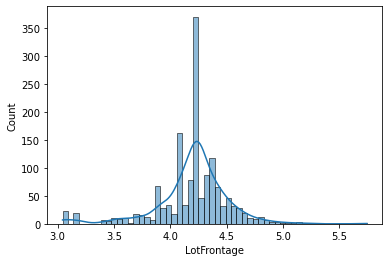

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

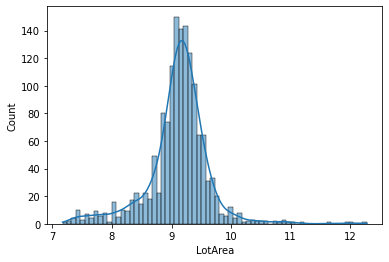

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

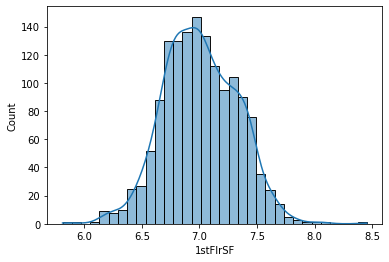

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

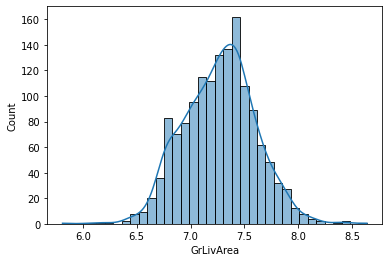

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

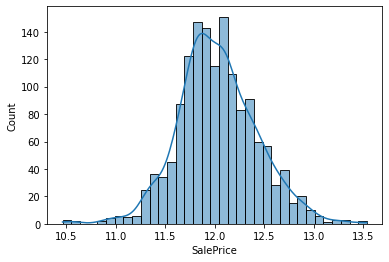

In [13]:
for feature in skew_features:
    sns.histplot(x=feature, data=dataset, kde=True)
    plt.show()

## Handling Rare Categorical Feature
#### We will remove categorical variables that are present less than 1% of the observations

In [14]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [15]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [16]:
for feature in categorical_features:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)  # dividing by no of rows
    print(temp)

MSZoning
C (all)    0.006849
FV         0.044521
RH         0.010959
RL         0.788356
RM         0.149315
Name: SalePrice, dtype: float64
Street
Grvl    0.00411
Pave    0.99589
Name: SalePrice, dtype: float64
Alley
Grvl       0.034247
Missing    0.937671
Pave       0.028082
Name: SalePrice, dtype: float64
LotShape
IR1    0.331507
IR2    0.028082
IR3    0.006849
Reg    0.633562
Name: SalePrice, dtype: float64
LandContour
Bnk    0.043151
HLS    0.034247
Low    0.024658
Lvl    0.897945
Name: SalePrice, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: SalePrice, dtype: float64
LotConfig
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Inside     0.720548
Name: SalePrice, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: SalePrice, dtype: float64
Neighborhood
Blmngtn    0.011644
Blueste    0.001370
BrDale     0.010959
BrkSide    0.039726
ClearCr    0.019178
CollgCr    0.102740
Crawfor    0.034932
Edwards    0

In [17]:
for feature in categorical_features:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset) # dividing by no of rows
    temp_df = temp[temp>0.01].index 
    print(temp_df)

Index(['FV', 'RH', 'RL', 'RM'], dtype='object', name='MSZoning')
Index(['Pave'], dtype='object', name='Street')
Index(['Grvl', 'Missing', 'Pave'], dtype='object', name='Alley')
Index(['IR1', 'IR2', 'Reg'], dtype='object', name='LotShape')
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object', name='LandContour')
Index(['AllPub'], dtype='object', name='Utilities')
Index(['Corner', 'CulDSac', 'FR2', 'Inside'], dtype='object', name='LotConfig')
Index(['Gtl', 'Mod'], dtype='object', name='LandSlope')
Index(['Blmngtn', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NWAmes',
       'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
       'Somerst', 'StoneBr', 'Timber'],
      dtype='object', name='Neighborhood')
Index(['Artery', 'Feedr', 'Norm', 'PosN', 'RRAn'], dtype='object', name='Condition1')
Index(['Norm'], dtype='object', name='Condition2')
Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtyp

In [18]:
for feature in categorical_features:
    temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset) # dividing by no of rows
    temp_df = temp[temp>0.01].index     # index - feature name
    dataset[feature] = np.where(dataset[feature].isin(temp_df), dataset[feature], 'Rare_var')
    # if my features category is not present in temp_df then its replaced with new category 'Rare_Var'

### Target Guided Ordinal Encoding for Categorical features

In [19]:
for feature in categorical_features:
    label_ordered = dataset.groupby(feature)['SalePrice'].mean().sort_values().index
    label_ordered = {k:i for i,k in enumerate(label_ordered, 0)}
    dataset[feature] = dataset[feature].map(label_ordered)

In [20]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,1,1,0,0,14,2,...,4,2,2,3,2,0,4,2,2,3
1,3,1,2,0,1,1,2,0,11,1,...,4,2,2,3,2,0,4,2,2,3
2,3,1,2,1,1,1,0,0,14,2,...,4,2,2,3,2,0,4,2,2,3
3,3,1,2,1,1,1,1,0,16,2,...,2,1,2,3,2,0,4,2,2,0
4,3,1,2,1,1,1,2,0,22,2,...,4,2,2,3,2,0,4,2,2,3


## Feature Scaling using MinMaxScalar

In [21]:
feature_scale = [feature for feature in dataset.columns if feature not in ['Id','SalePrice']]
print(len(feature_scale))

82


In [22]:
dataset[feature_scale]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,60,3,4.174387,9.041922,1,2,0,1,1,0,...,4,2,0,2,2008,2,3,0,0,0
1,20,3,4.382027,9.169518,1,2,0,1,1,2,...,4,2,0,5,2007,2,3,0,0,0
2,60,3,4.219508,9.328123,1,2,1,1,1,0,...,4,2,0,9,2008,2,3,0,0,0
3,70,3,4.094345,9.164296,1,2,1,1,1,1,...,4,2,0,2,2006,2,0,0,0,0
4,60,3,4.430817,9.565214,1,2,1,1,1,2,...,4,2,0,12,2008,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,4.127134,8.976768,1,2,0,1,1,0,...,4,2,0,8,2007,2,3,0,0,0
1456,20,3,4.442651,9.486076,1,2,0,1,1,0,...,2,2,0,2,2010,2,3,0,0,0
1457,70,3,4.189655,9.109636,1,2,0,1,1,0,...,3,1,2500,5,2010,2,3,0,0,0
1458,20,3,4.219508,9.181632,1,2,0,1,1,0,...,4,2,0,4,2010,2,3,0,0,0


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [25]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
d = pd.DataFrame(data = scaler.fit_transform(dataset[feature_scale]), columns=dataset[feature_scale].columns)
d.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [33]:
data = pd.concat([d,dataset['SalePrice']], axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,SalePrice
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,...,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,12.247694
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,...,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,12.109011
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,...,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,12.317167
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,...,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,11.849398
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,...,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,12.429216


In [34]:
# We have Scaled our data between 0 to 1
# now its time for feature selection

In [35]:
data.to_csv('x_train.csv', index=False)